In [110]:
import pymc

import hddm

In [111]:
import hddm
import bauer
import numpy as np
#from hddm.simulators.hddm_dataset_generators import simulator_h_c
from hddm.simulators.basic_simulator import simulator
from hddm.simulators.hddm_dataset_generators import hddm_preprocess

In [112]:
model = 'ddm_hddm_base'

data = simulator(theta = [1., 1., 0.5, 0.5],
                 model = model,
                 n_samples = 500)

data = hddm_preprocess(data)

In [113]:
hddm_model = hddm.HDDM(data,
                        include = ['v', 'a', 't', 'z'],
                        informative = False,
                        is_group_model = False,
                       )

No model attribute --> setting up standard HDDM
Set model to ddm


In [114]:
from bauer.utils.data import load_garcia2022

In [115]:
df = load_garcia2022()

In [116]:
df['response'] = ~df['choice'].astype(np.int)
df['subj_idx'] = df.index.get_level_values('subject')

df['rt'] = df['rt'] / 1000.


df['log(n2/n1)'] = np.log(df['n2'] / df['n1'])

df['log_n1'] = np.log(df['n1'])
df['log_n2'] = np.log(df['n2'])

/tmp/ipykernel_17698/3806905500.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['response'] = ~df['choice'].astype(np.int)


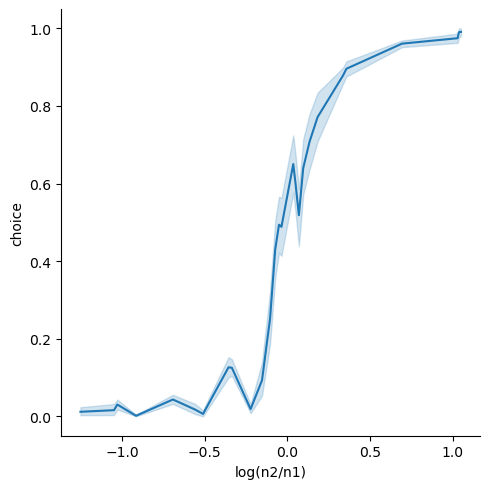

In [117]:
import seaborn as sns


# sns.relplot(x='log_n1', y='choice', data=df.reset_index(), kind='line')
sns.relplot(x='log(n2/n1)', y='choice', data=df.reset_index(), kind='line')

In [118]:
model = hddm.HDDMRegressor(df.loc[:5], models=['v ~ 0 + log_n1 + log_n2'],
                           include=['v', 'a', 't'],
                            is_group_model=True,
                           )

No model attribute --> setting up standard HDDM
Set model to ddm


In [119]:
trace = model.sample(100)

 [-----------------90%--------------    ] 90 of 100 complete in 7.8 sec

In [ ]:
stats = model.gen_stats()
# stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1'])]

In [ ]:
stats.loc['z']

mean       0.61138
std       0.026396
2.5q      0.553742
25q       0.601103
50q       0.615483
75q       0.628933
97.5q      0.64615
mc err     0.00264
Name: z, dtype: object